In [1]:
import glob, os, sys
sys.path.append("..")
from utils.utils import *
import uproot, ROOT, random, time, vector
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import json
from sklearn.metrics import roc_curve, roc_auc_score, auc
from tqdm import tqdm
import pandas as pd
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from xgboost import XGBClassifier

# Set up plot defaults
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = 12.0,8.0  # Roughly 11 cm wde by 8 cm high
mpl.rcParams['font.size'] = 14.0 # Use 14 point font
sns.set(style="whitegrid")

Welcome to JupyROOT 6.28/04


In [2]:
# path = '/global/homes/a/agarabag/pscratch/ditdau_samples/nom/'
# vbfh_path = [path+'user.shhirose.Httbst_b4.mc20_13TeV.346190.PoPy8_NNPDF30_VBFH125_ttl13l7.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.346191.PoPy8_NNPDF30_VBFH125_ttlm15hp20.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.346192.PoPy8_NNPDF30_VBFH125_ttlp15hm20.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.346193.PoPy8_NNPDF30_VBFH125_tth30h20.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.*.root']
# vbfh_dsid = [346190, 346191, 346192, 346193]
             
# ggh_path = [path+'user.shhirose.Httbst_b4.mc20_13TeV.345120.PoPy8_NNLO_30_ggH125_ttl13l7.PHYS.e5814_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.345121.PoPy8_NNLO_30_ggH125_ttlm15hp20.PHYS.e5814_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.345122.PoPy8_NNLO_30_ggH125_ttlp15hm20.PHYS.e5814_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.345123.PoPy8_NNLO_30_ggH125_tth30h20.PHYS.e5814_s3681_r13145_p5855.smPre_w_0_HS/user.*.root']
# ggh_dsid = [345120, 345121, 345122, 345123]

# vh_path = [path+'user.shhirose.Httbst_b4.mc20_13TeV.345211.PoPy8_NNPDF30__WmH125J_Winc_MINLO_tt.PHYS.e5808_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.345212.PoPy8_NNPDF30__WpH125J_Winc_MINLO_tt.PHYS.e5808_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.345217.PoPy8_NNPDF30__ZH125J_Zinc_MINLO_tt.PHYS.e5808_s3681_r13145_p5855.smPre_w_0_HS/user.*.root']
# vh_dsid = [345211, 345212, 345217]

# vv_path = [path+'user.shhirose.Httbst_b4.mc20_13TeV.700488.Sh_2211_WlvWqq.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700489.Sh_2211_WlvZqq.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700491.Sh_2211_WqqZvv.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700492.Sh_2211_WqqZll.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700493.Sh_2211_ZqqZll.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700495.Sh_2211_ZqqZvv.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700600.Sh_2212_llll.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700601.Sh_2212_lllv.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700602.Sh_2212_llvv_os.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700603.Sh_2212_llvv_ss.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700604.Sh_2212_lvvv.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700605.Sh_2212_vvvv.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root']
# vv_dsid = [700488, 700489, 700491, 700492, 700493, 700495, 700600, 700601, 700602, 700603, 700604, 700605]

# ztt_path = [path+'user.shhirose.Httbst_b4.mc20_13TeV.700792.Sh_2214_Ztt_maxHTpT_BF.PHYS.e8527_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700793.Sh_2214_Ztt_maxHTpT_CFBV.PHYS.e8527_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700794.Sh_2214_Ztt_maxHTpT_CVBV.PHYS.e8527_s3681_r13145_p5855.smPre_w_0_HS/user.*.root']
# ztt_dsid = [700792, 700793, 700794]

In [2]:
##### signal ######
vbfh_dsid = [346190, 346191, 346192, 346193]      
ggh_dsid = [345120, 345121, 345122, 345123]
WH_dsid = [345211, 345212]
ZH_dsid = [345217]
ttH_dsid = [346343,346344,346345]
vh_dsid = [345211, 345212, 345217]

##### background ######
vv_dsid = [700488, 700489, 700491, 700492, 700493, 700495, 700600, 700601, 700602, 700603, 700604, 700605]
ztt_dsid = [700792, 700793, 700794]
# ttV_dsid = [
#     410155, # ttW
#     410218, 410219, 410220, # ttZ
#     # 412043, 304014 # 4t,3t #! missing these samples
#     ]
Top_dsid = [
    410470, 410471, 
    # 410472, ##MISSING
    410644, 410645, 410646, 410647, 
    410658, 410659
]
W_dsid = [
    700338, 700339, 700340, # Wenu
    700341, 700342, 700343, # Wmunu
    700344, 700345, 700346, # WtaunuL
    700347, 700348, 700349, # WtaunuH #! should these be included? 
    700362, 700363, 700364, # W lep + 2jets
]
Zll_inc_dsid = [
    700320, 700321, 700322, # Zee 
    700323, 700324, 700325, # Zmumu
] 


In [3]:
def read_event_weights(event_id, data_year):
    file_path = './xsec_sumofweights_nom.json'
    # Load the data from the JSON file
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # Get the list of events from the key 'ditau_hh' under 'mc20a'
    events = data.get(data_year, {}).get('ditau_hh', [])

    # Iterate over each event in the list
    for event in events:
        # Check if the first element (ID) matches the provided event_id
        if event[0] == event_id:
            # Return the second (event weight) and third (sum of event weights) elements
            return (event[1], event[2])
    
    # If no matching ID is found, return None for both values
    return (None, None)

def fetch_weights(id_list, data_year):
    results = {}
    for event_id in id_list:
        event_weight, sum_event_weights = read_event_weights(event_id, data_year)
        if event_weight is None:
            print(event_id, "weights filled with one")
            results[event_id] = 1
        else: 
            results[event_id] = event_weight / sum_event_weights
    return results
            
vbfh_ws = fetch_weights(vbfh_dsid, 'mc20e')
ggh_ws = fetch_weights(ggh_dsid, 'mc20e')
vh_ws = fetch_weights(vh_dsid, 'mc20e')
wh_ws = fetch_weights(WH_dsid, 'mc20e')
zh_ws = fetch_weights(ZH_dsid, 'mc20e')
tth_ws = fetch_weights(ttH_dsid, 'mc20e')

vv_ws = fetch_weights(vv_dsid, 'mc20e')
ztt_ws = fetch_weights(ztt_dsid, 'mc20e')
# ttV_ws = fetch_weights(ttV_dsid, 'mc20e')
Top_ws = fetch_weights(Top_dsid, 'mc20e')
W_ws = fetch_weights(W_dsid, 'mc20e')
Zll_inc_ws = fetch_weights(Zll_inc_dsid, 'mc20e')


In [4]:
ggh_ws, vbfh_ws, vh_ws, vv_ws, ztt_ws

({345120: 2.0212026206827066e-09,
  345121: 9.425030499444042e-09,
  345122: 9.44410126030036e-09,
  345123: 7.400959896584742e-09},
 {346190: 3.328334122903121e-07,
  346191: 2.549934635756314e-07,
  346192: 2.5594716545460417e-07,
  346193: 8.930663891591884e-09},
 {345211: 2.473849483997504e-07,
  345212: 2.4438917000744885e-07,
  345217: 1.517906037006081e-07},
 {700488: 5.3890969934904166e-12,
  700489: 1.9497701952798617e-11,
  700491: 1.949792009414876e-11,
  700492: 2.441655930568653e-11,
  700493: 8.574958768410377e-12,
  700495: 1.2756139728894854e-11,
  700600: 1.221317679493521e-12,
  700601: 1.0418313396061567e-12,
  700602: 2.077712372028255e-12,
  700603: 4.3770307069093114e-11,
  700604: 3.4483180775898836e-12,
  700605: 1.1377011487579801e-11},
 {700792: 5.962806109287312e-13,
  700793: 7.996092592468891e-13,
  700794: 5.200913291636743e-13})

Ten variables are used as input to the NN: pT of the two leptons and leading
jet, p
miss
T
, mass and pT of the Higgs boson reconstructed from the τ candidates and ~p
miss
T
, ST
(defined as the scalar sum of the pT of all jets and leptons in the events), transverse mass of the
4
lepton and ~p
miss
T
, value of the MVA isolation of the closest boosted τh
candidate to the muon
(electron) in the µτh
and eµ (eτh
and eµ) channels, and di-τ mass.

In [3]:
branches = \
['HLT_j420',
 'HLT_j420_a10t_lcw_jes_35smcINF_L1J100',
 'HLT_j420_a10t_lcw_jes_35smcINF_L1SC111',
 'ditau_obj_IsTruthHadronic',
 'ditau_obj_IsTruthMatched',
#  'boson_0_p4',
 'ditau_obj_truth_p4',
 'jets_b_tag_score',
#  'ditau_obj_R_jet',
#  'ditau_obj_R_subjet',
#  'ditau_obj_Rr_core',
 'ditau_obj_bdt_score',
#  'ditau_obj_charge',
 'ditau_obj_leadsubjet_charge',
 'ditau_obj_leadsubjet_n_core_tracks',
 'ditau_obj_leadsubjet_p4',
 'ditau_obj_nSubjets',
#  'ditau_obj_n_iso_tracks',
 'ditau_obj_n_tracks',
 'ditau_obj_p4',
#  'ditau_obj_subjets_dR',
 'ditau_obj_subleadsubjet_charge',
 'ditau_obj_subleadsubjet_n_core_tracks',
 'ditau_obj_subleadsubjet_p4',
#  'ditau_obj_tauJetVtxFraction',
 # 'missing_pt',
 # 'ditau_visible_mass',
#  'jets_p4',
#  'ditau_obj_truth_leadTau_p4',
#  'ditau_obj_truth_p4',
#  'ditau_obj_truth_subleadTau_p4',
 'NOMINAL_pileup_combined_weight',
 'n_bjets_DL1dv01_FixedCutBEff_70',
 'weight_mc']

data_branches = \
['HLT_j420',
 'HLT_j420_a10t_lcw_jes_35smcINF_L1J100',
 'HLT_j420_a10t_lcw_jes_35smcINF_L1SC111',
 'jets_b_tag_score',
 'ditau_obj_bdt_score',
 'ditau_obj_leadsubjet_charge',
 'ditau_obj_leadsubjet_n_core_tracks',
 'ditau_obj_leadsubjet_p4',
 'ditau_obj_nSubjets',
 'ditau_obj_n_tracks',
 'ditau_obj_p4',
 'ditau_obj_subleadsubjet_charge',
 'ditau_obj_subleadsubjet_n_core_tracks',
 'ditau_obj_subleadsubjet_p4',
 'n_bjets_DL1dv01_FixedCutBEff_70']

In [6]:
path_template = '/global/homes/a/agarabag/pscratch/ditdau_samples/nom_new/mc20e/user.shhirose.*{dsid}.*/user.*.root'

def read_root(dsid_list, mc_ws):
    out = []
    for dsid in dsid_list:
        # Using wildcard pattern around the DSID
        file_pattern = path_template.format(dsid=dsid)
        files = glob.glob(file_pattern)
        s = time.time()
        for file in files:
            with uproot.open(file + ':NOMINAL') as f_1:
                events = f_1.arrays(branches, library='ak')
                events['weight'] = mc_ws[dsid] * ak.ones_like(events['ditau_obj_n_tracks'])
                out = ak.concatenate((out, events))
        print("Processed:", len(files), "files for DSID", dsid, "Time spent:", round(time.time()-s, 4), 's')
    return out

vbfh = read_root(vbfh_dsid, vbfh_ws)
ggh = read_root(ggh_dsid, ggh_ws)
vh = read_root(vh_dsid, vh_ws)
wh = read_root(WH_dsid, wh_ws)
zh = read_root(ZH_dsid, zh_ws)
tth = read_root(ttH_dsid, tth_ws)

vv = read_root(vv_dsid, vv_ws)
ztt = read_root(ztt_dsid, ztt_ws)
# ttV = read_root(ttV_dsid, ttV_ws)
Top = read_root(Top_dsid, Top_ws)
W = read_root(W_dsid, W_ws)
Zll_inc = read_root(Zll_inc_dsid, Zll_inc_ws)

Processed: 1 files for DSID 346190 Time spent: 0.1679 s
Processed: 1 files for DSID 346191 Time spent: 0.2306 s
Processed: 1 files for DSID 346192 Time spent: 0.1696 s
Processed: 1 files for DSID 346193 Time spent: 0.5785 s
Processed: 3 files for DSID 345120 Time spent: 0.473 s
Processed: 2 files for DSID 345121 Time spent: 0.411 s
Processed: 2 files for DSID 345122 Time spent: 0.3385 s
Processed: 2 files for DSID 345123 Time spent: 0.6844 s
Processed: 1 files for DSID 345211 Time spent: 0.2842 s
Processed: 1 files for DSID 345212 Time spent: 0.2009 s
Processed: 1 files for DSID 345217 Time spent: 0.2332 s
Processed: 1 files for DSID 345211 Time spent: 0.1743 s
Processed: 1 files for DSID 345212 Time spent: 0.2662 s
Processed: 1 files for DSID 345217 Time spent: 0.2099 s
Processed: 2 files for DSID 346343 Time spent: 26.7001 s
Processed: 1 files for DSID 346344 Time spent: 10.7931 s
Processed: 1 files for DSID 346345 Time spent: 3.454 s
Processed: 2 files for DSID 700488 Time spent: 13

In [4]:
## load data
path_template_data = '/global/homes/a/agarabag/pscratch/ditdau_samples/nom_new/data1_8_old/*.root'

def read_data_root(file_paths):
    out = []
    l1 = glob.glob(file_paths)
    s = time.time()
    for i in range(len(l1)):
        print("reading: ", l1[i])
        f_1 = uproot.open(l1[i]+':NOMINAL')
        events = f_1.arrays(data_branches, library='ak')
        out = ak.concatenate((events, out))
    print("processed: ", l1[i], "time spent", round(time.time()-s, 4), 's')
    return out

data = read_data_root(path_template_data)


reading:  /global/homes/a/agarabag/pscratch/ditdau_samples/nom_new/data1_8_old/user.shhirose.36959343._000006.HSM_common_cuts.root
reading:  /global/homes/a/agarabag/pscratch/ditdau_samples/nom_new/data1_8_old/user.shhirose.36959343._000029.HSM_common_cuts.root
reading:  /global/homes/a/agarabag/pscratch/ditdau_samples/nom_new/data1_8_old/user.shhirose.36959343._000088.HSM_common_cuts.root
reading:  /global/homes/a/agarabag/pscratch/ditdau_samples/nom_new/data1_8_old/user.shhirose.36959343._000002.HSM_common_cuts.root
reading:  /global/homes/a/agarabag/pscratch/ditdau_samples/nom_new/data1_8_old/user.shhirose.36959343._000356.HSM_common_cuts.root
reading:  /global/homes/a/agarabag/pscratch/ditdau_samples/nom_new/data1_8_old/user.shhirose.36959343._000482.HSM_common_cuts.root
reading:  /global/homes/a/agarabag/pscratch/ditdau_samples/nom_new/data1_8_old/user.shhirose.36959343._000007.HSM_common_cuts.root
reading:  /global/homes/a/agarabag/pscratch/ditdau_samples/nom_new/data1_8_old/user

In [8]:
# def read_root(file_paths, dsid_list, mc_ws):
#     out = []
#     for index in range(len(file_paths)):
#         l1 = glob.glob(os.path.join(file_paths[index]))
#         s = time.time()
#         for i in range(len(l1)):
#             f_1 = uproot.open(l1[i]+':NOMINAL')
#             events = f_1.arrays(branches, library='ak')
#             events['weight'] = mc_ws[dsid_list[index]]*ak.ones_like(events['ditau_obj_n_tracks']) 
#             out = ak.concatenate((events, out))
#         print("processed: ", l1[i], "time spent", round(time.time()-s, 4), 's')
#     return out
# # vbfh = read_root(vbfh_path, vbfh_dsid, vbfh_ws)
# # ggh = read_root(ggh_path, ggh_dsid, ggh_ws)
# # vh = read_root(vh_path, vh_dsid, vh_ws)
# # vv = read_root(vv_path, vv_dsid, vv_ws)
# # ztt = read_root(ztt_path, ztt_dsid, ztt_ws)


In [5]:
def Cut(t):
    cut = ak.where((t['ditau_obj_nSubjets'] >= 2) &
                   (t['n_bjets_DL1dv01_FixedCutBEff_70'] == 0) &
                   (t['ditau_obj_bdt_score'] >= 0.78) &
                   (t['HLT_j420'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111']) &
                   (t['ditau_obj_leadsubjet_charge'] * t['ditau_obj_subleadsubjet_charge'] == -1) &
                   (t['ditau_obj_n_tracks']-t['ditau_obj_leadsubjet_n_core_tracks']-t['ditau_obj_subleadsubjet_n_core_tracks'] == 0) &
                   (((t['ditau_obj_leadsubjet_n_core_tracks']==1) | (t['ditau_obj_leadsubjet_n_core_tracks']==3)) &
                   ((t['ditau_obj_subleadsubjet_n_core_tracks']==1) | (t['ditau_obj_subleadsubjet_n_core_tracks']==3))))

    return t[cut]

def data_Cut(t):
    cut = ak.where((t['ditau_obj_nSubjets'] >= 2) &
                   (t['n_bjets_DL1dv01_FixedCutBEff_70'] == 0) &
                   (t['ditau_obj_bdt_score'] >= 0.78) &
                   (t['HLT_j420'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111']) &
                   (t['ditau_obj_leadsubjet_charge'] * t['ditau_obj_subleadsubjet_charge'] == 1) &
                   (t['ditau_obj_n_tracks']-t['ditau_obj_leadsubjet_n_core_tracks']-t['ditau_obj_subleadsubjet_n_core_tracks'] == 0) &
                   (((t['ditau_obj_leadsubjet_n_core_tracks']==1) | (t['ditau_obj_leadsubjet_n_core_tracks']==3)) &
                   ((t['ditau_obj_subleadsubjet_n_core_tracks']==1) | (t['ditau_obj_subleadsubjet_n_core_tracks']==3))))

    return t[cut]

In [9]:
ggh_cut = Cut(ggh)
vbfh_cut = Cut(vbfh)
vh_cut = Cut(vh)
wh_cut = Cut(wh)
zh_cut = Cut(zh)
tth_cut = Cut(tth)

vv_cut = Cut(vv)
ztt_cut = Cut(ztt)
Top_cut = Cut(Top)
W_cut = Cut(W)
Zll_inc_cut = Cut(Zll_inc)



In [6]:
data_cut = data_Cut(data)

In [7]:
len(data_cut['ditau_obj_subleadsubjet_n_core_tracks'])

40

In [18]:
def Printcut(t):
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) & (t['ditau_obj_bdt_score'] >= 0.72))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) & (t['ditau_obj_bdt_score'] >= 0.72) &
                   (t['HLT_j420'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111']))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) & (t['ditau_obj_bdt_score'] >= 0.72) &
           (t['HLT_j420'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111']) &
            (t['ditau_obj_leadsubjet_charge'] * t['ditau_obj_subleadsubjet_charge'] == -1))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) & (t['ditau_obj_bdt_score'] >= 0.72) &
               (t['HLT_j420'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111']) &
                (t['ditau_obj_leadsubjet_charge'] * t['ditau_obj_subleadsubjet_charge'] == -1) & 
                 (t['ditau_obj_n_tracks']-t['ditau_obj_leadsubjet_n_core_tracks']-t['ditau_obj_subleadsubjet_n_core_tracks'] == 0))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) & (t['ditau_obj_bdt_score'] >= 0.72) &
                   (t['HLT_j420'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111']) &
                   (t['ditau_obj_leadsubjet_charge'] * t['ditau_obj_subleadsubjet_charge'] == -1) &
                   (t['ditau_obj_n_tracks']-t['ditau_obj_leadsubjet_n_core_tracks']-t['ditau_obj_subleadsubjet_n_core_tracks'] == 0) &
                   (((t['ditau_obj_leadsubjet_n_core_tracks']==1) | (t['ditau_obj_leadsubjet_n_core_tracks']==3)) &
                   ((t['ditau_obj_subleadsubjet_n_core_tracks']==1) | (t['ditau_obj_subleadsubjet_n_core_tracks']==3))))[0]))


def data_Printcut(t):
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) & (t['ditau_obj_bdt_score'] >= 0.72))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) & (t['ditau_obj_bdt_score'] >= 0.72) &
                   (t['n_bjets_DL1dv01_FixedCutBEff_70'] == 0))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) & (t['ditau_obj_bdt_score'] >= 0.72) &
                     (t['n_bjets_DL1dv01_FixedCutBEff_70'] == 0) &
                   (t['HLT_j420'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111']))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) & (t['ditau_obj_bdt_score'] >= 0.72) &
           (t['HLT_j420'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111']) &
            (t['n_bjets_DL1dv01_FixedCutBEff_70'] == 0) &
            (t['ditau_obj_leadsubjet_charge'] * t['ditau_obj_subleadsubjet_charge'] == 1))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) & (t['ditau_obj_bdt_score'] >= 0.72) &
               (t['HLT_j420'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111']) &
                (t['n_bjets_DL1dv01_FixedCutBEff_70'] == 0) &
                (t['ditau_obj_leadsubjet_charge'] * t['ditau_obj_subleadsubjet_charge'] == 1) & 
                 (t['ditau_obj_n_tracks']-t['ditau_obj_leadsubjet_n_core_tracks']-t['ditau_obj_subleadsubjet_n_core_tracks'] == 0))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) & (t['ditau_obj_bdt_score'] >= 0.72) &
                   (t['HLT_j420'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111']) &
                     (t['n_bjets_DL1dv01_FixedCutBEff_70'] == 0) &
                   (t['ditau_obj_leadsubjet_charge'] * t['ditau_obj_subleadsubjet_charge'] == 1) &
                   (t['ditau_obj_n_tracks']-t['ditau_obj_leadsubjet_n_core_tracks']-t['ditau_obj_subleadsubjet_n_core_tracks'] == 0) &
                   (((t['ditau_obj_leadsubjet_n_core_tracks']==1) | (t['ditau_obj_leadsubjet_n_core_tracks']==3)) &
                   ((t['ditau_obj_subleadsubjet_n_core_tracks']==1) | (t['ditau_obj_subleadsubjet_n_core_tracks']==3))))[0]))
               

In [19]:
data_Printcut(data)

109798
2198
1878
1878
680
680
680


In [7]:
def Var(t):
    '''
    return 'leadsubjet_pT', 'subleadsubjet_pT', 
    //// 'higgs_m', 'higgs_pT',
    'pT_miss', 'ditau_m', 'leadsubjet_eta', 'subleadsubjet_eta',
    'leadsubjet_phi', 'subleadsubjet_phi',
    //////'collinear_mass'
    '''
    leadsubjet_p4 = vector.obj(pt=t['ditau_obj_leadsubjet_p4'].fP.fX,
                           eta=t['ditau_obj_leadsubjet_p4'].fP.fY,
                           phi=t['ditau_obj_leadsubjet_p4'].fP.fZ,
                           energy=t['ditau_obj_leadsubjet_p4'].fE)
    
    subleadsubjet_p4 = vector.obj(pt=t['ditau_obj_subleadsubjet_p4'].fP.fX,
                           eta=t['ditau_obj_subleadsubjet_p4'].fP.fY,
                           phi=t['ditau_obj_subleadsubjet_p4'].fP.fZ,
                           energy=t['ditau_obj_subleadsubjet_p4'].fE)
    
    # jets_pt = vector.obj(px=t['jets_p4'].fP.fX, py=t['jets_p4'].fP.fY)
#     lead_jet_pt = vector.obj(px=leadsubjet_p4.px, py=leadsubjet_p4.py)
#     sublead_jet_pt = vector.obj(px=subleadsubjet_p4.px, py=subleadsubjet_p4.py)

    delta_phi = vector.obj(pt=leadsubjet_p4.pt, phi=leadsubjet_p4.phi, eta=leadsubjet_p4.eta).deltaphi(vector.obj(pt=subleadsubjet_p4.pt, phi=subleadsubjet_p4.phi, eta=subleadsubjet_p4.eta))
    delta_eta = vector.obj(pt=leadsubjet_p4.pt, phi=leadsubjet_p4.phi, eta=leadsubjet_p4.eta).deltaeta(vector.obj(pt=subleadsubjet_p4.pt, phi=subleadsubjet_p4.phi, eta=subleadsubjet_p4.eta))
    delta_R = vector.obj(pt=leadsubjet_p4.pt, phi=leadsubjet_p4.phi, eta=leadsubjet_p4.eta).deltaR(vector.obj(pt=subleadsubjet_p4.pt, phi=subleadsubjet_p4.phi, eta=subleadsubjet_p4.eta))
    k_t = delta_R*subleadsubjet_p4.pt
    kappa = delta_R*(subleadsubjet_p4.pt/(subleadsubjet_p4.pt+leadsubjet_p4.pt))



    # ditau_p4 = vector.obj(px=t['ditau_obj_truth_p4'].fP.fX,
    #                        py=t['ditau_obj_truth_p4'].fP.fY,
    #                        pz=t['ditau_obj_truth_p4'].fP.fZ,
    #                        energy=t['ditau_obj_truth_p4'].fE)
    # boson_p4 = vector.obj(px=t['boson_0_p4'].fP.fX,
    #                        py=t['boson_0_p4'].fP.fY,
    #                        pz=t['boson_0_p4'].fP.fZ,
    #                        energy=t['boson_0_p4'].fE)
    
    lumi_scale_factor = 58450.1 #for mc20e
    combined_weights = t['weight'] * t['weight_mc'] * t['NOMINAL_pileup_combined_weight'] * lumi_scale_factor
    
    # ditau_met = -np.sqrt(ditau_p4.px**2 + ditau_p4.py**2)
    # boson_met = -np.sqrt(boson_p4.px**2 + boson_p4.py**2)
    # print(ditau_met)
    # print("BBBBB: ", boson_met)
    # truth_met = boson_met - ditau_met

    # pT_miss = np.sqrt(ak.sum(jets_pt.px, axis=-1)**2 + ak.sum(jets_pt.py, axis=-1)**2)

    visible_ditau_m = (leadsubjet_p4 + subleadsubjet_p4).mass    

    # x_lead = leadsubjet_p4.pt / (leadsubjet_p4.pt+pT_miss)
    # x_sublead = subleadsubjet_p4.pt / (subleadsubjet_p4.pt+pT_miss)
    # collinear_mass = ditau_m / np.sqrt(x_lead*x_sublead)
    
    # return [leadsubjet_p4.pt, subleadsubjet_p4.pt, \
    #         visible_ditau_m, leadsubjet_p4.eta, subleadsubjet_p4.eta, \
    #         leadsubjet_p4.phi, subleadsubjet_p4.phi, combined_weights]
    return [leadsubjet_p4.pt, subleadsubjet_p4.pt, visible_ditau_m, k_t, kappa, delta_R, delta_phi, delta_eta, combined_weights]

    # return {
    #     'leadsubjet_pT': leadsubjet_p4.pt, 
    #     'subleadsubjet_pT': subleadsubjet_p4.pt,
    #     'ditau_m': ditau_m, 
    #     'leadsubjet_eta': leadsubjet_p4.eta, 
    #     'subleadsubjet_eta': subleadsubjet_p4.eta,
    #     'leadsubjet_phi': leadsubjet_p4.phi, 
    #     'subleadsubjet_phi': subleadsubjet_p4.phi}

def Data_Var(t):
    leadsubjet_p4 = vector.obj(pt=t['ditau_obj_leadsubjet_p4'].fP.fX,
                           eta=t['ditau_obj_leadsubjet_p4'].fP.fY,
                           phi=t['ditau_obj_leadsubjet_p4'].fP.fZ,
                           energy=t['ditau_obj_leadsubjet_p4'].fE)
    subleadsubjet_p4 = vector.obj(pt=t['ditau_obj_subleadsubjet_p4'].fP.fX,
                           eta=t['ditau_obj_subleadsubjet_p4'].fP.fY,
                           phi=t['ditau_obj_subleadsubjet_p4'].fP.fZ,
                           energy=t['ditau_obj_subleadsubjet_p4'].fE)
    delta_R = vector.obj(pt=leadsubjet_p4.pt, phi=leadsubjet_p4.phi, eta=leadsubjet_p4.eta).deltaR(vector.obj(pt=subleadsubjet_p4.pt, phi=subleadsubjet_p4.phi, eta=subleadsubjet_p4.eta))
    delta_phi = vector.obj(pt=leadsubjet_p4.pt, phi=leadsubjet_p4.phi, eta=leadsubjet_p4.eta).deltaphi(vector.obj(pt=subleadsubjet_p4.pt, phi=subleadsubjet_p4.phi, eta=subleadsubjet_p4.eta))
    delta_eta = vector.obj(pt=leadsubjet_p4.pt, phi=leadsubjet_p4.phi, eta=leadsubjet_p4.eta).deltaeta(vector.obj(pt=subleadsubjet_p4.pt, phi=subleadsubjet_p4.phi, eta=subleadsubjet_p4.eta))
    k_t = delta_R*subleadsubjet_p4.pt
    kappa = delta_R*(subleadsubjet_p4.pt/(subleadsubjet_p4.pt+leadsubjet_p4.pt))
    visible_ditau_m = (leadsubjet_p4 + subleadsubjet_p4).mass    
    return [leadsubjet_p4.pt, subleadsubjet_p4.pt, visible_ditau_m, k_t, kappa, delta_R, delta_phi, delta_eta]


In [12]:
ggh_plot = Var(ggh_cut)
vbfh_plot = Var(vbfh_cut)
vh_plot = Var(vh_cut)
wh_plot = Var(wh_cut)
zh_plot = Var(zh_cut)
tth_plot = Var(tth_cut)

vv_plot = Var(vv_cut)
ztt_plot = Var(ztt_cut)
Top_plot = Var(Top_cut)
W_plot = Var(W_cut)
Zll_inc_plot = Var(Zll_inc_cut)


In [8]:
data_plot = Data_Var(data_cut)
data_s = np.array(data_plot).T
data_plot = pd.DataFrame(data_s, columns=['leadsubjet_pT', 'subleadsubjet_pT', 'visible_ditau_m', 'k_t', 'kappa', 'delta_R', 'delta_phi', 'delta_eta'])
data_plot

,leadsubjet_pT,subleadsubjet_pT,visible_ditau_m,k_t,kappa,delta_R,delta_phi,delta_eta
0,218.895266,34.972219,66.451676,25.483845,0.100382,0.728688,-0.278767,-0.673258
1,439.640625,21.460885,44.176246,8.746130,0.018968,0.407538,0.354527,-0.200992
2,346.108750,211.786313,110.325624,85.402885,0.153081,0.403250,-0.022110,-0.402644
3,423.366062,13.274518,62.253112,10.308223,0.023608,0.776542,-0.594926,0.499080
4,407.528375,85.296516,50.556070,22.738903,0.046140,0.266587,0.258451,-0.065357
5,312.010750,36.761738,108.684206,37.314876,0.106989,1.015047,0.837977,-0.572813
6,193.347516,120.096555,47.420835,37.264011,0.118886,0.310284,-0.309092,-0.027167
7,332.514687,37.369582,104.994491,36.238675,0.097973,0.969737,0.936657,-0.251126
8,412.866531,11.722276,67.482546,11.543456,0.027187,0.984745,0.948302,0.265417
9,224.413953,97.689805,45.703129,28.064020,0.087127,0.287277,-0.225680,-0.177754


In [9]:
len(data_plot)

40

In [10]:
save_path = '/global/homes/a/agarabag/pscratch/ditdau_samples/nom_new/mc20e/'

# save vut files to a csv file
def save_to_csv(data, name):
    data_s =  np.array(data)
    # data_s has shape (7, n)
    data_s = data_s.T
    df = pd.DataFrame(data_s, columns=['leadsubjet_pT', 'subleadsubjet_pT', 'visible_ditau_m', 'k_t', 'kappa', 'delta_R', 'delta_phi', 'delta_eta', 'combined_weights'])
    df.to_csv(save_path + name + '.csv', index=False)
    

save_to_csv(ggh_plot, 'ggh')
save_to_csv(vbfh_plot, 'vbfh')
save_to_csv(vh_plot, 'vh')
save_to_csv(wh_plot, 'wh')
save_to_csv(zh_plot, 'zh')
save_to_csv(tth_plot, 'tth')

save_to_csv(vv_plot, 'vv')
save_to_csv(ztt_plot, 'ztt')
save_to_csv(Top_plot, 'Top')
save_to_csv(W_plot, 'W')
save_to_csv(Zll_inc_plot, 'Zll_inc')





NameError: name 'ggh_plot' is not defined

In [9]:
# read the csv files
save_path = '/global/homes/a/agarabag/pscratch/ditdau_samples/nom_new/mc20e/'

ggh_plot = pd.read_csv(save_path + 'ggh.csv')
vbfh_plot = pd.read_csv(save_path + 'vbfh.csv')
vh_plot = pd.read_csv(save_path + 'vh.csv')
wh_plot = pd.read_csv(save_path + 'wh.csv')
zh_plot = pd.read_csv(save_path + 'zh.csv')
tth_plot = pd.read_csv(save_path + 'tth.csv')

vv_plot = pd.read_csv(save_path + 'vv.csv')
ztt_plot = pd.read_csv(save_path + 'ztt.csv')
Top_plot = pd.read_csv(save_path + 'Top.csv')
W_plot = pd.read_csv(save_path + 'W.csv')
Zll_inc_plot = pd.read_csv(save_path + 'Zll_inc.csv')

In [10]:
len(vbfh_plot), len(ggh_plot), len(vh_plot), len(wh_plot), len(zh_plot), len(tth_plot), len(vv_plot), len(ztt_plot), len(Top_plot), len(W_plot), len(Zll_inc_plot)

(363, 108, 25, 10, 15, 10, 976, 27524, 10, 76, 2405)

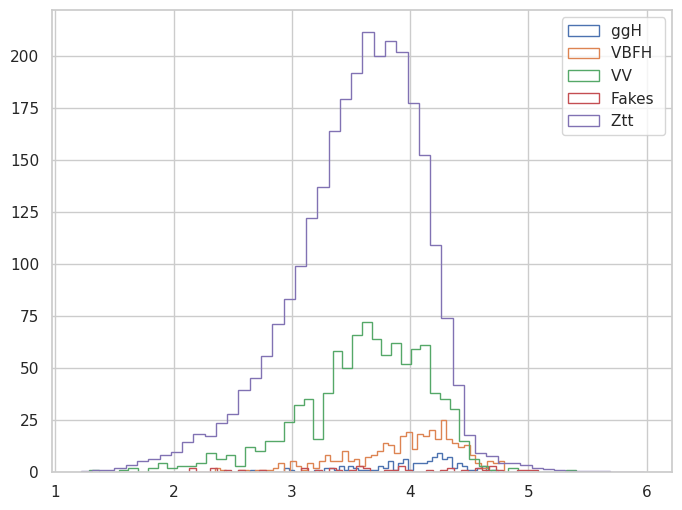

In [11]:
plt.figure(figsize=(8, 6))
plot_int = 'k_t'
plt.hist(np.log(ggh_plot[plot_int]), bins=50, histtype='step', linewidth=1, label=f'ggH ')
plt.hist(np.log(vbfh_plot[plot_int]), bins=50, histtype='step', linewidth=1, label=f'VBFH ')
plt.hist(np.log(vv_plot[plot_int]), bins=50, histtype='step', linewidth=1, label=f'VV ')
#plot data  
plt.hist(np.log(data_plot[plot_int]), bins=50, histtype='step', linewidth=1, label=f'Fakes ')
plt.hist(np.log(ztt_plot[plot_int]), bins=50, histtype='step', linewidth=1, label=f'Ztt ', weights=np.ones_like(ztt_plot[plot_int])/10)
plt.legend()
plt.grid(True)
plt.show()

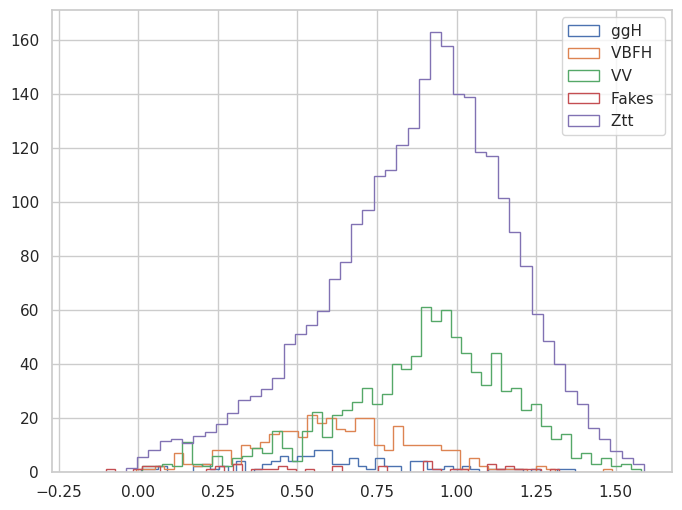

In [11]:
plt.figure(figsize=(8, 6))
plot_int = 'delta_R'
plt.hist(np.log(1/ggh_plot[plot_int]), bins=50, histtype='step', linewidth=1, label=f'ggH ')
plt.hist(np.log(1/vbfh_plot[plot_int]), bins=50, histtype='step', linewidth=1, label=f'VBFH ')
plt.hist(np.log(1/vv_plot[plot_int]), bins=50, histtype='step', linewidth=1, label=f'VV ')
plt.hist(np.log(1/data_plot[plot_int]), bins=50, histtype='step', linewidth=1, label=f'Fakes ')
plt.hist(np.log(1/ztt_plot[plot_int]), bins=50, histtype='step', linewidth=1, label=f'Ztt ', weights=np.ones_like(ztt_plot[plot_int])/10)
plt.legend()
#log y axis
# plt.yscale('log')
plt.grid(True)
plt.show()

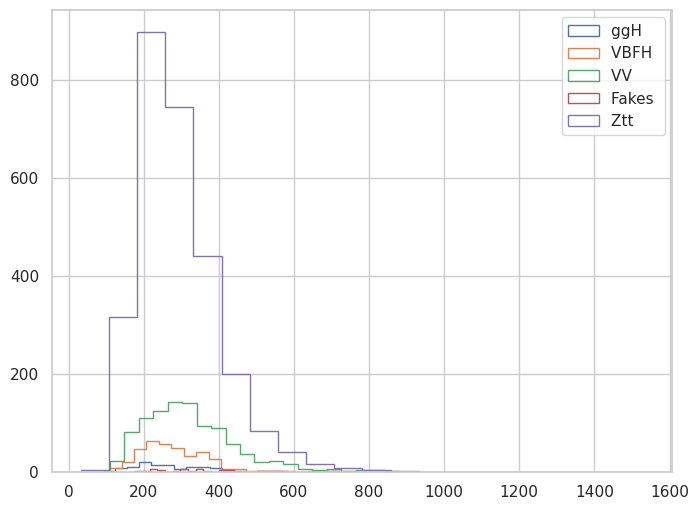

In [63]:
plt.figure(figsize=(8, 6))
plot_int = 'leadsubjet_pT'
plt.hist(ggh_plot[plot_int], bins=20, histtype='step', linewidth=1, label=f'ggH ')
plt.hist(vbfh_plot[plot_int], bins=20, histtype='step', linewidth=1, label=f'VBFH ')
plt.hist(vv_plot[plot_int], bins=20, histtype='step', linewidth=1, label=f'VV ')
plt.hist(data_plot[plot_int], bins=20,histtype='step', linewidth=1, label=f'Fakes ')
plt.hist(ztt_plot[plot_int], bins=20, histtype='step', linewidth=1, label=f'Ztt ', weights=np.ones_like(ztt_plot[plot_int])/10)
plt.legend()
# plt.yscale('log')
plt.grid(True)
plt.show()

Start Plot: leadsubjet_pT


KeyError: 0

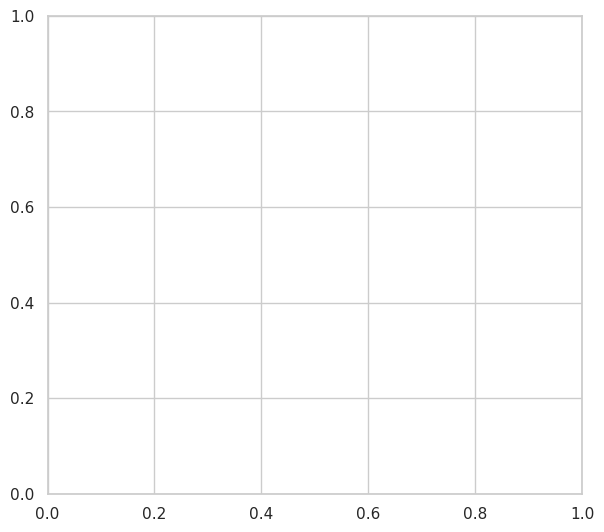

In [62]:
# plot_var = [
#     'leadsubjet_pT', 'subleadsubjet_pT',
#     'ditau_m', 'leadsubjet_eta', 'subleadsubjet_eta',
#     'leadsubjet_phi', 'subleadsubjet_phi'
# ]
plot_var = [
    'leadsubjet_pT', 'subleadsubjet_pT',
    'ditau_m', 'kt', 'kappa', 'delta_R'
]

plt.figure(figsize=(40, 36))
def hist(variable, plot_num):
    print("Start Plot:", variable)
    plt.subplot(5, 5, plot_num+1)
    bin = 50
    plt.hist(ggh_plot[i], bins=bin, histtype='step', linewidth=1, label=f'ggH ')
    plt.hist(vbfh_plot[i], bins=bin, histtype='step', linewidth=1, label=f'VBFH ')
    plt.hist(vv_plot[i], bins=bin, histtype='step', linewidth=1, label=f'VV ')
    # plt.hist(ztt_plot[i], bins=bin, histtype='step', linewidth=1, label=f'Ztt ', weights=np.ones_like(ztt_plot[i])/10)
    plt.xlabel(variable)
    #plt.ylabel("Number of Events (scaled)")
    #plt.title(xlabel)
#     plt.yscale('log')
    plt.legend()
    plt.grid(True)

for i, label in enumerate(plot_var, 0):
    hist(label, i)

In [38]:
lumi_scale_factor = 58450.1 #for mc20e
plot_var = [
    'leadsubjet_pT', 'subleadsubjet_pT',
    'ditau_m', 'kt', 'kappa', 'delta_R'
]
def hist(variable):
    print("Start Plot:", variable)
    bin = 20
    plt.figure(figsize=(8, 6))  # Adjust the figsize as per your preference
    if variable == 'ditau_m':
        plt.hist(ggh_plot[i], bins=bin, range=(0, 150), histtype='step', linewidth=1, label=f'ggH ', weights=ggh_plot[6]*lumi_scale_factor)
        plt.hist(vbfh_plot[i], bins=bin, range=(0, 150), histtype='step', linewidth=1, label=f'VBFH ',  weights=vbfh_plot[6]*lumi_scale_factor)
        plt.hist(vv_plot[i], bins=bin, range=(0, 150), histtype='step', linewidth=1, label=f'VV ', weights=vv_plot[6]*lumi_scale_factor)
        #plto data
        plt.hist(data_plot[i], bins=bin, range=(0, 150), histtype='step', linewidth=1, label=f'Data ')
        plt.hist(ztt_plot[i], bins=bin, range=(0, 150), histtype='step', linewidth=1, label=f'Ztt / 10', weights=ztt_plot[6]*lumi_scale_factor/10)
    # elif variable == 'collinear_mass':
    #     plt.hist(ggh_plot[i], bins=bin, range=(0, 550), histtype='step', linewidth=1, label=f'ggH ', weights=ggh_plot[7]*lumi_scale_factor)
    #     plt.hist(vbfh_plot[i], bins=bin, range=(0, 550), histtype='step', linewidth=1, label=f'VBFH ',  weights=vbfh_plot[7]*lumi_scale_factor)
    #     plt.hist(vv_plot[i], bins=bin, range=(0, 550), histtype='step', linewidth=1, label=f'VV ', weights=vv_plot[7]*lumi_scale_factor)
    #     plt.hist(ztt_plot[i], bins=bin, range=(0, 550), histtype='step', linewidth=1, label=f'Ztt / 10', weights=ztt_plot[7]*lumi_scale_factor/10)
    else:
        plt.hist(ggh_plot[i], bins=bin, histtype='step', linewidth=1, label=f'ggH ', weights=ggh_plot[6]*lumi_scale_factor)
        plt.hist(vbfh_plot[i], bins=bin, histtype='step', linewidth=1, label=f'VBFH ',  weights=vbfh_plot[6]*lumi_scale_factor)
        plt.hist(vv_plot[i], bins=bin, histtype='step', linewidth=1, label=f'VV ', weights=vv_plot[6]*lumi_scale_factor)
        plt.hist(ztt_plot[i], bins=bin, histtype='step', linewidth=1, label=f'Ztt / 10', weights=ztt_plot[6]*lumi_scale_factor/10)
        
    plt.xlabel(variable)
    plt.ylabel("Number of Events (scaled)")
#     plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()

for i, label in enumerate(plot_var):
    hist(label)

Start Plot: leadsubjet_pT


KeyError: 0

<Figure size 800x600 with 0 Axes>

Warning in <TROOT::Append>: Replacing existing TH1: root_hist (Potential memory leak).


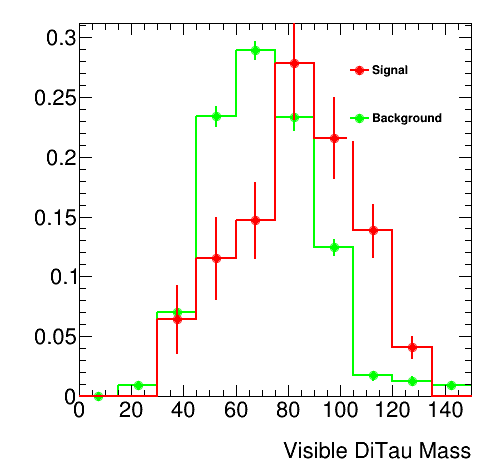

In [12]:
ROOT.gROOT.SetStyle("ATLAS")
canvas = ROOT.TCanvas("canvas", "eff_plots", 500, 500)
canvas.Clear()
canvas.cd()

# ggh_plt = plt_to_root_hist_w(ggh_plot[2], 10, 0, 150, None, False)
# ggh_plt.SetLineColor(ROOT.kRed)
# ggh_plt.SetMarkerColor(ROOT.kRed)
# vbfh_plt = plt_to_root_hist_w(vbfh_plot[2], 10, 0, 150, None, False)
# vbfh_plt.SetLineColor(ROOT.kBlue)
# vbfh_plt.SetMarkerColor(ROOT.kBlue)
# vv_plt = plt_to_root_hist_w(vv_plot[2], 10, 0, 150, None, False)
# vv_plt.SetLineColor(ROOT.kGreen)
# vv_plt.SetMarkerColor(ROOT.kGreen)
# ztt_plt = plt_to_root_hist_w(ztt_plot[2], 10, 0, 150, None, False)
# ztt_plt.SetLineColor(ROOT.kOrange)
# ztt_plt.SetMarkerColor(ROOT.kOrange)

#combine signal to one plot
all_signal = np.concatenate((ggh_plot['visible_ditau_m'], vbfh_plot['visible_ditau_m'], vh_plot['visible_ditau_m'], wh_plot['visible_ditau_m'], zh_plot['visible_ditau_m'], tth_plot['visible_ditau_m']))
all_signal_weights = np.concatenate((ggh_plot['combined_weights'], vbfh_plot['combined_weights'], vh_plot['combined_weights'], wh_plot['combined_weights'], zh_plot['combined_weights'], tth_plot['combined_weights']))
all_signal = plt_to_root_hist_w(all_signal, 10, 0, 150, all_signal_weights, False)
all_signal.SetLineColor(ROOT.kRed)
all_signal.SetMarkerColor(ROOT.kRed)
all_signal.SetMarkerStyle(20)

#combine background to one plot
all_background = np.concatenate((vv_plot['visible_ditau_m'], ztt_plot['visible_ditau_m'], W_plot['visible_ditau_m'], Top_plot['visible_ditau_m'], Zll_inc_plot['visible_ditau_m']))
all_background_weights = np.concatenate((vv_plot['combined_weights'], ztt_plot['combined_weights'], W_plot['combined_weights'], Top_plot['combined_weights'], Zll_inc_plot['combined_weights']))
all_background = plt_to_root_hist_w(all_background, 10, 0, 150, all_background_weights, False)
all_background.SetLineColor(ROOT.kGreen)
all_background.SetMarkerColor(ROOT.kGreen)
all_background.SetMarkerStyle(20)

# ggh_plt = plt_to_root_hist_w(ggh_plot['visible_ditau_m'], 20, 0, 150, ggh_plot['combined_weights']*lumi_scale_factor, False)
# ggh_plt.SetLineColor(ROOT.kBlue)
# ggh_plt.SetMarkerColor(ROOT.kBlue)
# ggh_plt.SetMarkerStyle(20)
# vbfh_plt = plt_to_root_hist_w(vbfh_plot['visible_ditau_m'], 20, 0, 150, vbfh_plot['combined_weights']*lumi_scale_factor, False)
# vbfh_plt.SetLineColor(ROOT.kRed)
# vbfh_plt.SetMarkerColor(ROOT.kRed)
# vbfh_plt.SetMarkerStyle(20)
# vh_plt = plt_to_root_hist_w(vh_plot['visible_ditau_m'], 20, 0, 150, vh_plot['combined_weights']*lumi_scale_factor, False)
# vh_plt.SetLineColor(ROOT.kYellow)
# vh_plt.SetMarkerColor(ROOT.kYellow)
# vh_plt.SetMarkerStyle(20)
# wh_plt = plt_to_root_hist_w(wh_plot['visible_ditau_m'], 20, 0, 150, wh_plot['combined_weights']*lumi_scale_factor, False)
# wh_plt.SetLineColor(ROOT.kGreen)
# wh_plt.SetMarkerColor(ROOT.kGreen)
# wh_plt.SetMarkerStyle(20)
# zh_plt = plt_to_root_hist_w(zh_plot['visible_ditau_m'], 20, 0, 150, zh_plot['combined_weights']*lumi_scale_factor, False)
# zh_plt.SetLineColor(ROOT.kOrange)
# zh_plt.SetMarkerColor(ROOT.kOrange)
# zh_plt.SetMarkerStyle(20)
# tth_plt = plt_to_root_hist_w(tth_plot['visible_ditau_m'], 20, 0, 150, tth_plot['combined_weights']*lumi_scale_factor, False)
# tth_plt.SetLineColor(ROOT.kMagenta)
# tth_plt.SetMarkerColor(ROOT.kMagenta)
# tth_plt.SetMarkerStyle(20)

# vv_plt = plt_to_root_hist_w(vv_plot['visible_ditau_m'], 20, 0, 150, vv_plot['combined_weights'], False)
# vv_plt.SetLineColor(ROOT.kGreen)
# vv_plt.SetMarkerColor(ROOT.kGreen)
# vv_plt.SetMarkerStyle(20)
# ztt_plt = plt_to_root_hist_w(ztt_plot['visible_ditau_m'], 20, 0, 150, ztt_plot['combined_weights'], False)
# ztt_plt.SetLineColor(ROOT.kOrange)
# ztt_plt.SetMarkerColor(ROOT.kOrange)
# ztt_plt.SetMarkerStyle(20)
# w_plt = plt_to_root_hist_w(W_plot['visible_ditau_m'], 20, 0, 150, W_plot['combined_weights'], False)
# w_plt.SetLineColor(ROOT.kBlack)
# w_plt.SetMarkerColor(ROOT.kBlack)
# w_plt.SetMarkerStyle(20)
# top_plt = plt_to_root_hist_w(Top_plot['visible_ditau_m'], 20, 0, 150, Top_plot['combined_weights'], False)
# top_plt.SetLineColor(ROOT.kGray)
# top_plt.SetMarkerColor(ROOT.kGray)
# top_plt.SetMarkerStyle(20)
# zll_inc_plt = plt_to_root_hist_w(Zll_inc_plot['visible_ditau_m'], 20, 0, 150, Zll_inc_plot['combined_weights'], False)
# zll_inc_plt.SetLineColor(ROOT.kCyan)
# zll_inc_plt.SetMarkerColor(ROOT.kCyan)
# zll_inc_plt.SetMarkerStyle(20)

# ggh_plt.Scale(1. / ggh_plt.Integral())
# vbfh_plt.Scale(1. / vbfh_plt.Integral())
# vv_plt.Scale(1. / vv_plt.Integral())
# ztt_plt.Scale(1. / ztt_plt.Integral())

# ztt_plt.Draw("hist e ")
# zll_inc_plt.Draw("hist e same")
# vv_plt.Draw("hist e same")
# top_plt.Draw("hist e same")
# w_plt.Draw("hist e same")
# vbfh_plt.Draw("hist e same")
# ggh_plt.Draw("hist e same")
# zh_plt.Draw("hist e same")
# wh_plt.Draw("hist e same")
# tth_plt.Draw("hist e same")
# vh_plt.Draw("hist e same")

all_background.Scale(1. / all_background.Integral())
all_signal.Scale(1. / all_signal.Integral())

all_background.Draw("hist e")
all_signal.Draw("hist e same")

all_background.GetXaxis().SetTitle('Visible DiTau Mass')

legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.SetBorderSize(0)
legend.SetFillColor(0)
# legend.AddEntry(ggh_plt, "ggH")
# legend.AddEntry(vbfh_plt, "VBFH")
# legend.AddEntry(vh_plt, "VH")
# legend.AddEntry(wh_plt, "WH")
# legend.AddEntry(zh_plt, "ZH")
# legend.AddEntry(tth_plt, "ttH")
# legend.AddEntry(vv_plt, "VV")
# legend.AddEntry(ztt_plt, "Ztt")
# legend.AddEntry(w_plt, "W")
# legend.AddEntry(top_plt, "Top")
# legend.AddEntry(zll_inc_plt, "Zll_inc")

legend.AddEntry(all_signal, "Signal")
legend.AddEntry(all_background, "Background")

legend.Draw()
canvas.Draw()


In [15]:
significance_bin_by_bin(all_signal, all_background, s_much_less_than_b=False)

bin 1, signal = 0.0, background = 2.1670434519986247e-05, significance = 0.0
bin 2, signal = 0.0, background = 0.009267239391261804, significance = 0.0
bin 3, signal = 0.06405332332816834, background = 0.07039258471245645, significance = 0.21421078844754193
bin 4, signal = 0.11521842488528887, background = 0.23400957622754442, significance = 0.221808630913289
bin 5, signal = 0.14704188430736131, background = 0.2892978824349101, significance = 0.2540794960970405
bin 6, signal = 0.2785763573351848, background = 0.2333333567330566, significance = 0.49723421008624114
bin 7, signal = 0.21593218055643076, background = 0.12441682531010446, significance = 0.5031354669483543
bin 8, signal = 0.1383554736453432, background = 0.01717151973583717, significance = 0.6393100907536581
bin 9, signal = 0.040822355942222714, background = 0.012922033072035386, significance = 0.26750631159270744
bin 10, signal = 0.0, background = 0.009167311948273688, significance = 0.0
bin 11, signal = 0.0, background = 0.

1.0678510652870479

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


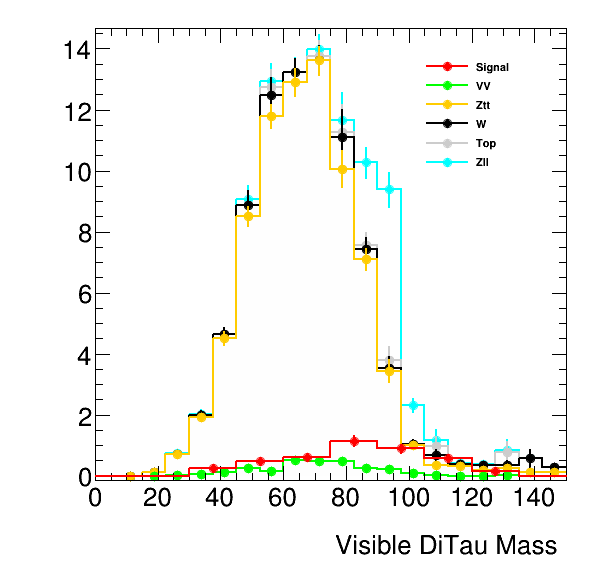

In [21]:
# make root fplot of all signal stracked together and all background stacked together
canvas = ROOT.TCanvas("canvas", "eff_plots", 600, 600)
canvas.Clear()
canvas.cd()

#stacked signal
# stacked_signal = ROOT.THStack("stacked_signal", "stacked_signal")
# stacked_signal.Add(ggh_plt)
# stacked_signal.Add(vbfh_plt)
# stacked_signal.Add(vh_plt)
# stacked_signal.Add(wh_plt)
# stacked_signal.Add(zh_plt)
# stacked_signal.Add(tth_plt)

#stacked background
stacked_background = ROOT.THStack("stacked_background", "stacked_background")
stacked_background.Add(vv_plt)
stacked_background.Add(ztt_plt)
stacked_background.Add(w_plt)
stacked_background.Add(top_plt)
stacked_background.Add(zll_inc_plt)

stacked_background.Draw("hist e")
all_signal.Draw("hist e same")

stacked_background.GetXaxis().SetTitle('Visible DiTau Mass')

legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.SetBorderSize(0)
legend.SetFillColor(0)
# legend.AddEntry(ggh_plt, "ggH")
# legend.AddEntry(vbfh_plt, "VBFH")
# legend.AddEntry(vh_plt, "VH")
# legend.AddEntry(wh_plt, "WH")
# legend.AddEntry(zh_plt, "ZH")
# legend.AddEntry(tth_plt, "ttH")
legend.AddEntry(all_signal, "Signal")
legend.AddEntry(vv_plt, "VV")
legend.AddEntry(ztt_plt, "Ztt")
legend.AddEntry(w_plt, "W")
legend.AddEntry(top_plt, "Top")
legend.AddEntry(zll_inc_plt, "Zll")
#make legend text size bigger
legend.SetTextSize(0.02)
#sapce out the markers in the legend
legend.SetMargin(0.5)
#sepreate markers in the legend
legend.SetEntrySeparation(0.1)


legend.Draw()

canvas.Draw()


In [12]:
import logging

def bin_significance_counting(signal, bkg, s_much_less_than_b=True):
    """
    Helper function to compute significance in a given bin
    Given by the following formula:

    Z = sqrt(2 * ((s + b) * log(1 + s / b) - s))
    """
    if s_much_less_than_b:
        return signal / np.sqrt(bkg)
    else:
        sig = (signal + bkg) * np.log(1 + signal / bkg) - signal
        sig = np.sqrt(2 * sig)
        return sig

def significance_bin_by_bin(signal, bkg, s_much_less_than_b=True):
    """
    Calculate total significance using bin-by-bin significance
    via a simple sum in quadrature of each bin significance
    """

    tot_signifiance = 0
    for iBin, (s, b) in enumerate(zip(signal, bkg)):
        if b <= 0:
            continue
        _sig = bin_significance_counting(s, b, s_much_less_than_b=s_much_less_than_b)
        print(
            'bin {}, signal = {}, background = {}, significance = {}'.format(
            iBin, s, b, _sig))
        tot_signifiance += _sig * _sig

    return np.sqrt(tot_signifiance)

In [31]:
sig_list = np.concatenate([np.array(ggh_plot[2]), np.array(vbfh_plot[2])])
sig_w_list = np.concatenate([np.array(ggh_plot[7])*lumi_scale_factor, np.array(vbfh_plot[7])*lumi_scale_factor])

bkg_list = np.concatenate([np.array(vv_plot[2]), np.array(ztt_plot[2])])
bkg_w_list = np.concatenate([np.array(vv_plot[7])*lumi_scale_factor, np.array(ztt_plot[7])*lumi_scale_factor])

sig_hist = plt_to_root_hist_w(sig_list, 20, 0, 150, sig_w_list, False)
bkg_hist = plt_to_root_hist_w(bkg_list, 20, 0, 150, bkg_w_list, False)
# sig_hist.Scale(1000.)
# bkg_hist.Scale(1000.)

significance_bin_by_bin(sig_hist, bkg_hist, s_much_less_than_b=False)

1.0590920574944254

Warning in <TROOT::Append>: Replacing existing TH1: root_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: root_hist (Potential memory leak).


Start Scatter Plot: leadsubjet_eta vs leadsubjet_phi


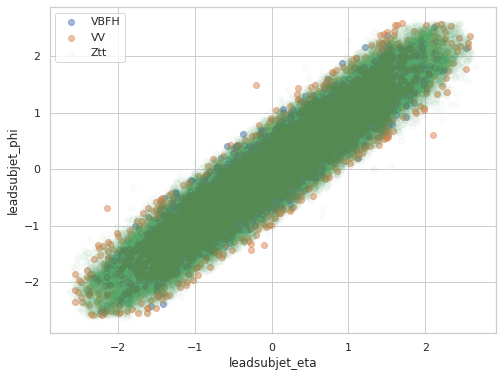

In [25]:

def scatter(variable_x, variable_y):
    print("Start Scatter Plot:", variable_x, "vs", variable_y)
    plt.figure(figsize=(8, 6))  # Adjust the figsize as per your preference
#     plt.scatter(ggh_plot[i], ggh_plot[j], label='ggH', alpha=0.5, )
    plt.scatter(vbfh_plot[4], vbfh_plot[5], label='VBFH', alpha=0.5)
    plt.scatter(vv_plot[4], vv_plot[5], label='VV', alpha=0.5)
    plt.scatter(ztt_plot[4], ztt_plot[5], label='Ztt', alpha=0.03)
    plt.xlabel(variable_x)
    plt.ylabel(variable_y)
    plt.legend()
    plt.grid(True)
    plt.show()


scatter("leadsubjet_eta", 'leadsubjet_phi')

In [119]:
# # training_var = [
# #     'leadsubjet_pT', 'subleadsubjet_pT',
# #     'ditau_m', 'leadsubjet_eta', 'subleadsubjet_eta',
# #     'leadsubjet_phi', 'subleadsubjet_phi', 'weight'
# # ]
# # training_var = [
# #     'leadsubjet_pT', 'subleadsubjet_pT',
# #     'ditau_m', 'weight'
# # ]
# training_var = [
#     'leadsubjet_pT', 'subleadsubjet_pT',
#     'ditau_m', 'kt', 'kappa', 'delta_R', 'weight'
# ]

# ggh_df = pd.DataFrame(np.array(ggh_plot).T, columns=training_var)
# vbfh_df = pd.DataFrame(np.array(vbfh_plot).T, columns=training_var)
# vv_df = pd.DataFrame(np.array(vv_plot).T, columns=training_var)
# ztt_df = pd.DataFrame(np.array(ztt_plot).T, columns=training_var)
# print(len(ggh_df), len(vbfh_df), len(vv_df), len(ztt_df))
# #combine ggh_df, vbfh_df into one df and add label column with values 1
# ggh_df['label'] = 1
# vbfh_df['label'] = 1
# vv_df['label'] = 0
# ztt_df['label'] = 0
# df = pd.concat([ggh_df, vbfh_df, vv_df, ztt_df])
# df

In [13]:
vbfh_plot['label'] = 1
ggh_plot['label'] = 1
vh_plot['label'] = 1
wh_plot['label'] = 1
zh_plot['label'] = 1
tth_plot['label'] = 1

vv_plot['label'] = 0
ztt_plot['label'] = 0
W_plot['label'] = 0
Top_plot['label'] = 0
Zll_inc_plot['label'] = 0
data_plot['label'] = 0

df = pd.concat([ggh_plot, vbfh_plot, vh_plot, wh_plot, zh_plot, tth_plot, vv_plot, ztt_plot, W_plot, Top_plot, Zll_inc_plot, data_plot])
# training_var = [
#     'leadsubjet_pT', 'subleadsubjet_pT',
#     'visible_ditau_m', 'k_t', 'delta_R', 'combined_weights', 'label'
# ]
training_var = [
    'leadsubjet_pT', 'subleadsubjet_pT',
    'visible_ditau_m', 'delta_R', 'delta_phi', 'delta_eta', 'label'
]

df = df[training_var]

# df['delta_R'] = np.log(1/df['delta_R'])
# df['k_t'] = np.log(df['k_t'])

#drop weight column
# df = df.drop(columns=['combined_weights'])
df

,leadsubjet_pT,subleadsubjet_pT,visible_ditau_m,delta_R,delta_phi,delta_eta,label
0,139.989297,126.701258,74.897043,0.553461,0.032699,0.552494,1
1,359.833188,84.161641,63.942459,0.360656,-0.290024,0.214381,1
2,400.943844,115.577930,84.311948,0.383036,0.155194,0.350187,1
3,201.959062,147.150516,71.444143,0.413066,0.278582,-0.304984,1
4,225.826516,73.411187,52.665282,0.408792,0.395573,-0.103116,1
...,...,...,...,...,...,...,...
35,216.729453,194.103609,118.141424,0.576014,-0.563908,-0.117474,0
36,407.566438,80.594992,66.446908,0.362050,-0.137642,-0.334866,0
37,344.627406,157.324281,159.941846,0.695974,-0.680141,0.147610,0
38,364.758062,13.620217,70.017972,0.941407,-0.319047,0.885696,0


In [14]:
#check how many rows there are with label 1 and 0
df['label'].value_counts()

label
0    31031
1      531
Name: count, dtype: int64

Index(['leadsubjet_pT', 'subleadsubjet_pT', 'visible_ditau_m', 'delta_R'], dtype='object')
58.43879472693032


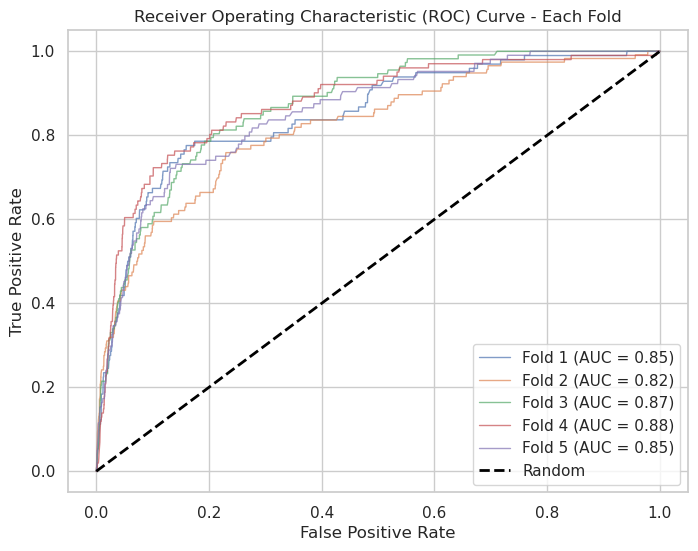

In [15]:
# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store scores
signal_scores = []
background_scores = []

training_var = [
    'leadsubjet_pT', 'subleadsubjet_pT',
    'visible_ditau_m', 'delta_R', 'label'
]
X = df[training_var[:-1]]  # Features
print(X.columns)
y = df['label']  # Target variable

scale_pos_weight = len(y[y == 0]) / len(y[y == 1])
print(scale_pos_weight)
plt.figure(figsize=(8, 6))

# Iterate through each fold
# for train_index, test_index in kf.split(X):
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # Split train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #change column names to f1, f2, f3, f4, f5
    X_train.columns = ['f0', 'f1', 'f2', 'f3']
    X_test.columns = ['f0', 'f1', 'f2', 'f3']
    
    params = {
    'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50,
    'eval_metric': 'logloss',
    'random_state': 2,
    'scale_pos_weight': scale_pos_weight,
    'base_score': 0.5,
    # 'base_score': 1.e-9,
    # 'max_delta_step': 3,
    'objective':'binary:logistic', 
    # 'num_class': 1,
    'gamma': 0.001,
    'verbosity': 1
    }
    model = XGBClassifier(**params)
    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_pred_proba = model.predict_proba(X_test)
    # Extract scores for signal and background
    signal_scores.extend(y_pred_proba[:, 1][y_test == 1])
    background_scores.extend(y_pred_proba[:, 1][y_test == 0])

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.7, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='black', lw=2, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Each Fold')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [16]:
import xgboost as xgb
def get_basescore(model: xgb.XGBModel) -> float:
    import json

    """Get base score from an XGBoost sklearn estimator."""
    base_score = float(json.loads(model.get_booster().save_config())["learner"]["learner_model_param"]["base_score"])
    return base_score

print(get_basescore(model)) # usually 0.5

0.5


In [45]:
booster = model.get_booster()
booster.dump_model('xgboost_k_fold_model.txt')

In [53]:
model.save_model('xgboost_k_fold_model_v05.bin')

/global/homes/a/agarabag/.conda/envs/ditau/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [20:55:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1705650052425/work/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [54]:
#split the data into training and testing
training_var_s = [
    'leadsubjet_pT', 'subleadsubjet_pT',
    'visible_ditau_m', 'delta_R'
]
X = df[training_var_s]
y = df['label']
X.columns = ['f0', 'f1', 'f2', 'f3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)
#save weights in a separate variable
# weights_train = np.abs(X_train['combined_weights']*lumi_scale_factor)
# weights_test = np.abs(X_test['combined_weights']*lumi_scale_factor)

# weights should not be included in the training data
# X_train.drop(columns='combined_weights', inplace=True)
# X_test.drop(columns='combined_weights', inplace=True)

#Change column names to integers if needed (for ML models that expect numerical feature names)
# feature_mapping = {feature: i for i, feature in enumerate(X_train.columns)}
# X_train.rename(columns=feature_mapping, inplace=True)
# X_test.rename(columns=feature_mapping, inplace=True)

# istead of integers call the vaibels f1, f2, f3, f4
# X_train.columns = ['f0', 'f1', 'f2', 'f3']
# X_test.columns = ['f0', 'f1', 'f2', 'f3']
print(X_train.shape)
print(X_test.shape)

#print size of training and testing data
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, weights_train.shape, weights_test.shape)
print(X_test)


(23671, 4)
(7891, 4)
               f0          f1          f2        f3
13581  229.442516   48.253684   53.500902  0.486874
593    259.117594  175.550938  103.362246  0.488574
15376  168.579344  150.584625   70.634646  0.435052
4714   194.383875  111.672281   71.845514  0.485077
9182   313.449000   73.045750   75.172845  0.500250
...           ...         ...         ...       ...
5569   237.126375  101.745344   50.808118  0.317122
21190  230.722578   71.493523   78.809248  0.601495
14183  310.415656   28.478437   58.786730  0.618751
11669  311.149906   36.654230   50.309156  0.466713
1058   330.509844  211.610938   90.768590  0.341788

[7891 rows x 4 columns]


In [55]:
len(X)

31562

In [56]:
#test k-fold model 
k_fold_y_pred_proba = model.predict_proba(X)
print(k_fold_y_pred_proba)
k_fold_y_pred_proba_signal = k_fold_y_pred_proba[:, 1][y == 1]
k_fold_y_pred_proba_background = k_fold_y_pred_proba[:, 1][y == 0]

[[0.2174663  0.7825337 ]
 [0.7867497  0.2132503 ]
 [0.50767374 0.4923263 ]
 ...
 [0.8315687  0.16843127]
 [0.8916774  0.10832264]
 [0.7591088  0.24089125]]


In [34]:
model_dump = model.get_booster().get_dump(dump_format='json')
def predict_tree(tree, inst):
    if 'children' in tree:
        feature_id = tree['split']
        threshold = tree['split_condition']
        # default direction for missing value
        default_left = (tree['missing'] == tree['yes'])
        if feature_id not in inst:  # missing value
            return predict_tree(tree['children'][0 if default_left else 1], inst)
        elif inst[feature_id] < threshold:  # test is true, go to left child
            return predict_tree(tree['children'][0], inst)
        else:   # test is false, go to right child
            return predict_tree(tree['children'][1], inst)
    else:
        return tree['leaf']
def predict(model_dump, inst):
    return np.sum([predict_tree(json.loads(model_dump[i]), inst) for i in range(len(model_dump))])
def proba(model_dump, inst):
    val = predict(model_dump, inst)
    return (1.0 / (1.0 + np.exp(-val)))
proba(model_dump, {'f0': 229.442516, 'f1': 48.253684, 'f2': 53.500902, 'f3': 0.486874})

0.35699023513316874

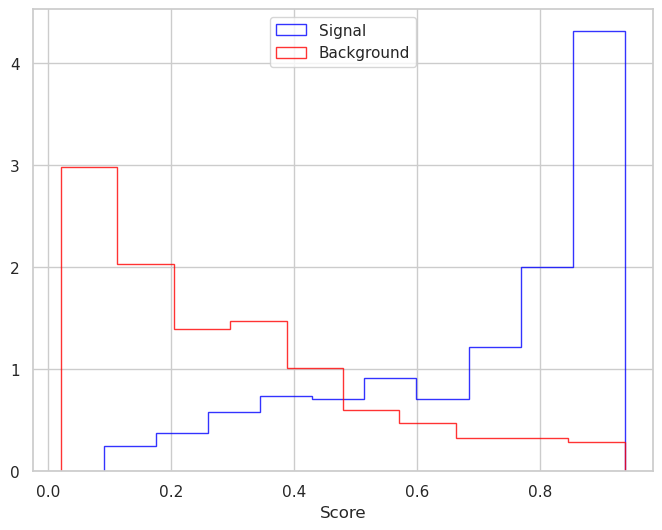

In [57]:
plt.figure(figsize=(8, 6))
plt.hist(k_fold_y_pred_proba_signal, bins=10, alpha=0.8, color='blue', label='Signal', histtype='step', density=True)
plt.hist(k_fold_y_pred_proba_background, bins=10, alpha=0.8, color='red', label='Background', histtype='step', density=True)
plt.xlabel('Score')
# plt.yscale('log')
plt.legend(loc='upper center')
plt.grid(True)
plt.show()

In [58]:
sig_hist = plt_to_root_hist_w(k_fold_y_pred_proba_signal, 10, 0., 1., None, False)
bkg_hist = plt_to_root_hist_w(k_fold_y_pred_proba_background, 10, 0., 1., None, False)
# sig_hist.Scale(all_signal.Integral()/sig_hist.Integral())
# bkg_hist.Scale(all_background.Integral()/bkg_hist.Integral())
sig_hist.Scale(1/sig_hist.Integral())
bkg_hist.Scale(1/bkg_hist.Integral())
significance_bin_by_bin(sig_hist, bkg_hist, s_much_less_than_b=False) ###0.99 with False

bin 1, signal = 0.0018832391713747645, background = 0.2477844735909252, significance = 0.0037785023230773314
bin 2, signal = 0.030131826741996232, background = 0.2059231091489156, significance = 0.06487279921276044
bin 3, signal = 0.03954802259887005, background = 0.1436305629854017, significance = 0.1000413841486949
bin 4, signal = 0.06779661016949153, background = 0.13828107376494472, significance = 0.1698301312091245
bin 5, signal = 0.07344632768361582, background = 0.09538848248525668, significance = 0.21425261663627612
bin 6, signal = 0.08851224105461393, background = 0.056169636814798106, significance = 0.311063066961223
bin 7, signal = 0.0790960451977401, background = 0.03992781412136251, significance = 0.31908575565144676
bin 8, signal = 0.1431261770244821, background = 0.033514872224549644, significance = 0.548587793539827
bin 9, signal = 0.2787193973634651, background = 0.02974444909928781, significance = 0.9410269427504023
bin 10, signal = 0.19774011299435026, background = 0

1.5334458753804687

Warning in <TROOT::Append>: Replacing existing TH1: root_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: root_hist (Potential memory leak).


In [59]:
%jsroot on
ROOT.gROOT.SetStyle("ATLAS")

# plot sig_hist and bkg_hist
canvas = ROOT.TCanvas("canvas", "eff_plots", 600, 600)
canvas.Clear()
canvas.cd()

#plot signal
sig_hist.SetLineColor(ROOT.kRed)
sig_hist.SetMarkerColor(ROOT.kRed)
sig_hist.SetMarkerStyle(20)
#plot background
bkg_hist.SetLineColor(ROOT.kBlue)
bkg_hist.SetMarkerColor(ROOT.kBlue)
bkg_hist.SetMarkerStyle(20)

#set y axis range 
bkg_hist.GetYaxis().SetRangeUser(0, 0.4)

bkg_hist.Draw("hist e ")
sig_hist.Draw("hist e same")

sig_hist.GetXaxis().SetTitle('Score')

legend = ROOT.TLegend(0.3, 0.7, 0.6, 0.6)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.AddEntry(sig_hist, "Signal")
legend.AddEntry(bkg_hist, "Background")


legend.Draw()

canvas.Draw()



Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


In [77]:
# create the BDT
params = {
    'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100,
    'eval_metric': 'logloss',
    'random_state': 2,
    'scale_pos_weight': scale_pos_weight,
    'base_score': 0.5,
    'gamma': 0.001,
    'verbosity': 1
    }
bdt = XGBClassifier(**params)

# Train the classifier
# bdt.fit(X_train, y_train, eval_set=[(X_test, y_test)], sample_weight=weights_train)
bdt.fit(X_train, y_train, eval_set=[(X_test, y_test)])


[0]	validation_0-logloss:0.68969
[1]	validation_0-logloss:0.68631
[2]	validation_0-logloss:0.68300
[3]	validation_0-logloss:0.67975
[4]	validation_0-logloss:0.67657
[5]	validation_0-logloss:0.67346
[6]	validation_0-logloss:0.67041
[7]	validation_0-logloss:0.66745
[8]	validation_0-logloss:0.66451
[9]	validation_0-logloss:0.66165
[10]	validation_0-logloss:0.65886
[11]	validation_0-logloss:0.65611
[12]	validation_0-logloss:0.65321
[13]	validation_0-logloss:0.65053
[14]	validation_0-logloss:0.64774
[15]	validation_0-logloss:0.64505
[16]	validation_0-logloss:0.64248
[17]	validation_0-logloss:0.63989
[18]	validation_0-logloss:0.63728
[19]	validation_0-logloss:0.63486
[20]	validation_0-logloss:0.63235
[21]	validation_0-logloss:0.63004
[22]	validation_0-logloss:0.62761
[23]	validation_0-logloss:0.62526
[24]	validation_0-logloss:0.62302
[25]	validation_0-logloss:0.62075
[26]	validation_0-logloss:0.61846
[27]	validation_0-logloss:0.61633
[28]	validation_0-logloss:0.61417
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.001, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=2, ...)

In [78]:
model_dump = bdt.get_booster().get_dump(dump_format='json')
def predict_tree(tree, inst):
    if 'children' in tree:
        feature_id = tree['split']
        threshold = tree['split_condition']
        # default direction for missing value
        default_left = (tree['missing'] == tree['yes'])
        if feature_id not in inst:  # missing value
            return predict_tree(tree['children'][0 if default_left else 1], inst)
        elif inst[feature_id] < threshold:  # test is true, go to left child
            return predict_tree(tree['children'][0], inst)
        else:   # test is false, go to right child
            return predict_tree(tree['children'][1], inst)
    else:
        return tree['leaf']
def predict(model_dump, inst):
    return np.sum([predict_tree(json.loads(model_dump[i]), inst) for i in range(len(model_dump))])
def proba(model_dump, inst):
    val = predict(model_dump, inst)
    return (1.0 / (1.0 + np.exp(-val)))
proba(model_dump, {'f0': 229.442516, 'f1': 48.253684, 'f2': 53.500902, 'f3': 0.486874})

0.4480576537202827

               f0          f1          f2        f3
13581  229.442516   48.253684   53.500902  0.486874
593    259.117594  175.550938  103.362246  0.488574
15376  168.579344  150.584625   70.634646  0.435052
4714   194.383875  111.672281   71.845514  0.485077
9182   313.449000   73.045750   75.172845  0.500250
...           ...         ...         ...       ...
5569   237.126375  101.745344   50.808118  0.317122
21190  230.722578   71.493523   78.809248  0.601495
14183  310.415656   28.478437   58.786730  0.618751
11669  311.149906   36.654230   50.309156  0.466713
1058   330.509844  211.610938   90.768590  0.341788

[7891 rows x 4 columns]
[0.44805765 0.7454876  0.39753452 ... 0.42617878 0.41909748 0.40202528]


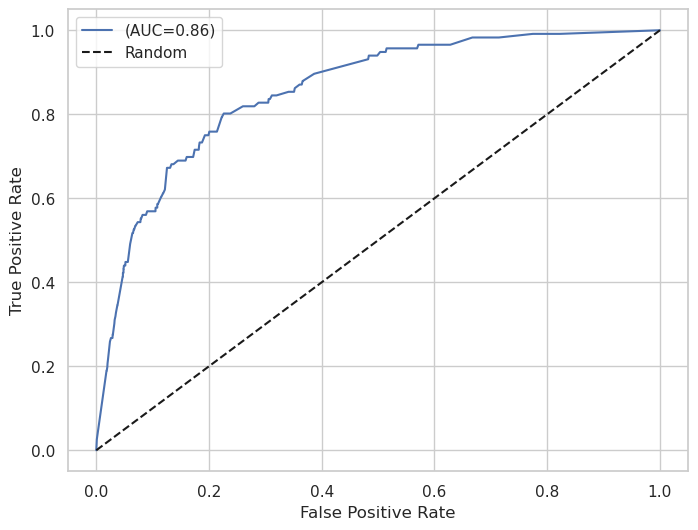

/tmp/ipykernel_883970/682549564.py:22: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr, 1/fpr, lw=1)


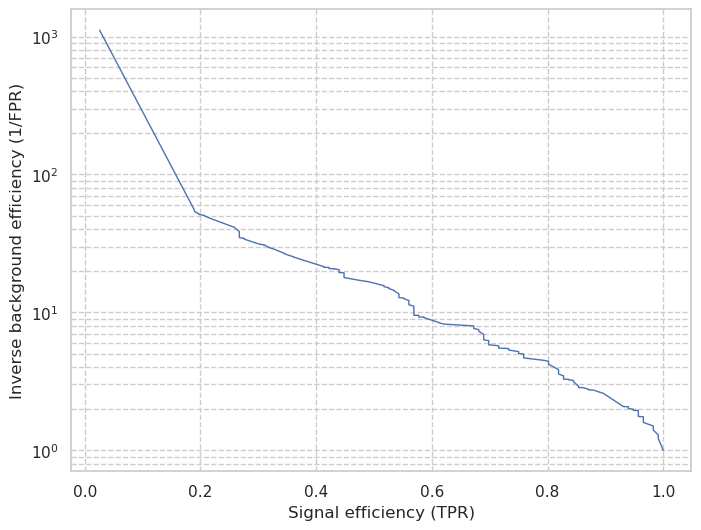

116 7775


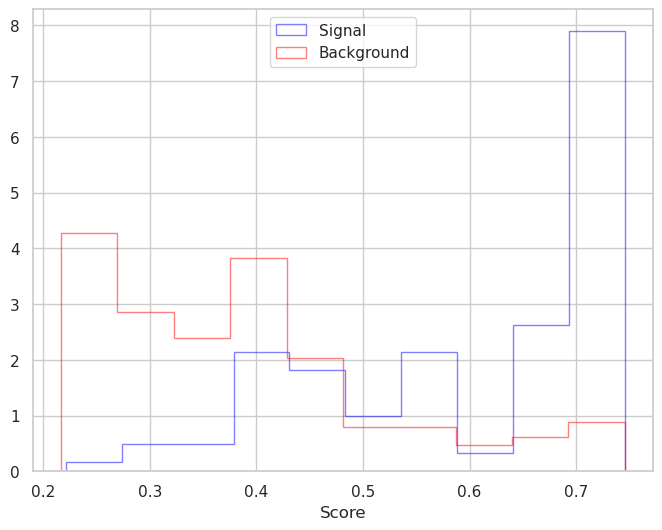

In [79]:
# plot the ROC curve
# print(bdt.predict_proba(X_test).shape)
# print(bdt.predict_proba(X_test))
print(X_test)
y_pred = bdt.predict_proba(X_test)[:, 1]
print(y_pred)
# fpr, tpr, thresholds = roc_curve(y_test, y_pred, sample_weight=weights_test)
# roc_auc = roc_auc_score(y_test, y_pred, sample_weight=weights_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'(AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(tpr, 1/fpr, lw=1)
plt.xlabel('Signal efficiency (TPR)')
plt.ylabel('Inverse background efficiency (1/FPR)')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.show()

print(len(y_pred[y_test == 1]), len(y_pred[y_test == 0]))

signal_scores = y_pred[y_test == 1]
background_scores = y_pred[y_test == 0]
plt.figure(figsize=(8, 6))
plt.hist(signal_scores, bins=10, alpha=0.5, color='blue', label='Signal', histtype='step', density=True)
plt.hist(background_scores, bins=10, alpha=0.5, color='red', label='Background', histtype='step', density=True)
plt.xlabel('Score')
# plt.yscale('log')
plt.legend(loc='upper center')
plt.grid(True)
plt.show()

In [29]:
# save bdt model to json file
bdt.save_model('./xgb_model.txt')

/global/homes/a/agarabag/.conda/envs/ditau/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [16:57:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1705650052425/work/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [28]:
booster = bdt.get_booster()
booster.dump_model('xgboost_model_one_boost.txt')

In [108]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

start = time.time()

learning_rate = 0.0001
batch_size = 256
dropout = 0.1
neuron1 = 32
neuron2 = 125
# neuron3 = 512
neuron4 = 125
neuron5 = 32


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert to PyTorch tensors and move to device
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
# weights_train_tensor = torch.tensor(weights_train.values, dtype=torch.float32).to(device)

X_val_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)

# Define the Dataset
class SignalBackgroundDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
        # self.weights = weights

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Define the DNN model with dropout
class DNN(nn.Module):
    def __init__(self, input_size):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, neuron1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout)
        self.fc2 = nn.Linear(neuron1, neuron2)
        self.fc3 = nn.Linear(neuron2, neuron4)
        # self.fc4 = nn.Linear(neuron3, neuron4)
        self.fc5 = nn.Linear(neuron4, neuron5)
        self.fc6 = nn.Linear(neuron5, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        # x = self.relu(self.fc4(x))
        # x = self.dropout(x)
        x = self.relu(self.fc5(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc6(x))
        return x

model = DNN(X_train_tensor.shape[1]).to(device)
criterion = nn.BCELoss(reduction='none')
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Create DataLoader for training data
train_dataset = SignalBackgroundDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = SignalBackgroundDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

num_epochs = 60
patience = 6  # How many epochs to wait after last time validation loss improved.
best_val_loss = np.inf  # Initialize best validation loss to infinity
epochs_no_improve = 0  # Counter for epochs with no improvement

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions, total_predictions = 0, 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        # loss = (loss * batch_weights).mean()
        loss = loss.mean()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # binary classification for accuracy calculation
        preds = outputs.squeeze().round()
        correct_predictions += (preds == targets).sum().item()
        total_predictions += targets.size(0)

    train_accuracy = correct_predictions / total_predictions
    avg_training_loss = running_loss / len(train_loader)

    # Validation phase
    model.eval()
    val_running_loss = 0.0
    correct_predictions, total_predictions = 0, 0

    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            # loss = (loss * batch_weights).mean()
            loss = loss.mean()

            val_running_loss += loss.item()

            preds = outputs.squeeze().round()
            correct_predictions += (preds == targets).sum().item()
            total_predictions += targets.size(0)

    val_accuracy = correct_predictions / total_predictions
    avg_val_loss = val_running_loss / len(val_loader)

#     # Log metrics to W&B
#     wandb.log({
#         'epoch': epoch,
#         'training_loss': avg_training_loss,
#         'validation_loss': avg_val_loss,
#         'training_accuracy': train_accuracy,
#         'validation_accuracy': val_accuracy
#     })

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {avg_training_loss:.4e}, Validation Loss: {avg_val_loss:.4e}, Training Accuracy: {train_accuracy:.4e}, Validation Accuracy: {val_accuracy:.4e}")

    # Check if the validation loss improved
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        # Save the model
        # torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f'Early stopping triggered after {epoch + 1} epochs.')
            break  # Early stopping


# Evaluate on the validation set
model.eval()
val_predictions = []
with torch.no_grad():
    for inputs, targets in DataLoader(SignalBackgroundDataset(X_val_tensor, y_val_tensor), batch_size=batch_size, shuffle=False):
        inputs = inputs.to(device)
        outputs = model(inputs).squeeze()
        val_predictions.extend(outputs.cpu().numpy())
val_predictions = np.array(val_predictions)

# Compute ROC curve and ROC area
fpr_mlp, tpr_mlp, _ = roc_curve(y_test.values, val_predictions)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(22, 10))
plt.subplot(121)
plt.plot(fpr_mlp, tpr_mlp, label='MLP (area = {:.5f})'.format(roc_auc_mlp))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.plot(tpr_mlp, 1/fpr_mlp, color='black', lw=1)
plt.xlabel('Signal efficiency (TPR)')
plt.ylabel('Inverse backround efficiency (1/FPR)')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.show()

print(f'Pytorch Time: {(time.time() - start)/60} min')

Epoch 1/60, Training Loss: 9.1804e-02, Validation Loss: 7.2986e-02, Training Accuracy: 9.8607e-01, Validation Accuracy: 9.8777e-01
Epoch 2/60, Training Loss: 7.6560e-02, Validation Loss: 7.6757e-02, Training Accuracy: 9.8853e-01, Validation Accuracy: 9.8777e-01
Epoch 3/60, Training Loss: 7.3737e-02, Validation Loss: 7.3780e-02, Training Accuracy: 9.8854e-01, Validation Accuracy: 9.8777e-01
Epoch 4/60, Training Loss: 7.2939e-02, Validation Loss: 7.2420e-02, Training Accuracy: 9.8854e-01, Validation Accuracy: 9.8777e-01


KeyboardInterrupt: 

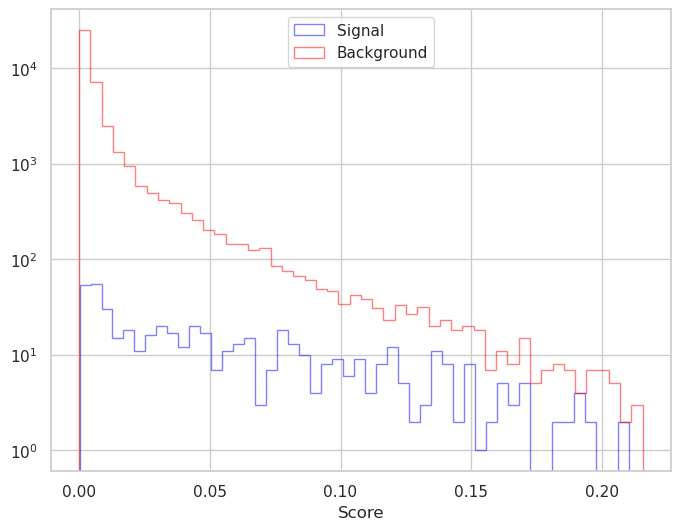

In [60]:
# plot score distribution from MLP
signal_scores = val_predictions[y_test == 1]
background_scores = val_predictions[y_test == 0]
plt.figure(figsize=(8, 6))
plt.hist(signal_scores, bins=50, alpha=0.5, color='blue', label='Signal', histtype='step')
plt.hist(background_scores, bins=50, alpha=0.5, color='red', label='Background', histtype='step')
plt.xlabel('Score')
plt.yscale('log')
plt.legend(loc='upper center')
# plt.grid(True)
plt.show()
